# INGENIERÍA DE DATOS PARA NOTAS

El proceso a realizar es el siguiente:
1. Imputación de datos
2. Tratamiento de outliers
3. Análisis descriptivo
4. Transformación y escalamiento de atributos

In [46]:
import pandas as pd
notas = pd.read_csv('notas.csv')

## Imputación de datos

In [47]:

notas.head()

,Unnamed: 0,Username,Grade,Grade Scaled,Quiz 1: Uso de modelos matemáticos en la economía,Quiz 2: Motivación y Función de Producción,Quiz 3: Preferencias y Toma de Decisiones,Quiz 4: Salario y Efectos,Quiz 5: Explicando Diferencias y Conclusión,Quiz 6: Introducción y conceptos iniciales,...,Quiz 21: Impuestos y Subsidios,Quiz 22: Eficiencia y externalidades,Quiz 23: Corrección de fallas,Quiz 24: Otras fuentes de ineficiencia,Quiz 25: Regla de la mayoría,Quiz 26: La paradoja de Condorcet,Quiz 27: Teorema del votante mediano,Quiz 28: Decisiones intertemporales,Quiz 29: Tópicos Adicionales,Quiz (Avg)
0,3,05743498d061bf472df897f1e5bdda6d62e99312c952e3...,0.94,6.6,0.75,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.905172
1,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,7.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517
2,5,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,0.99,6.9,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956897
3,6,81528304670b5be911641ecc2ba3a21195234d10c3ab43...,1.00,7.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517
4,7,4427f64ffb5a05abefc1aa6936fca72e2f8fc24ad5f11d...,0.91,6.3,Not Attempted,1.0,1.0,1.0,1.0,1.0,...,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.439655


In [48]:
# SE BUSCA QUE PASAR A FLOAT LOS NUMEROS

# Se modifica Not Atempted por -1
notas = notas.replace('Not Attempted', -1)

for col in notas.columns:
    columnas_listas = ['Unnamed: 0','Username','Grade','Grade Scaled','Quiz (Avg)']
    if col in columnas_listas:
        continue
    
    notas[col] = pd.to_numeric(notas[col], errors='coerce')

In [49]:
# Se verifica que funcionó
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         587 non-null    int64  
 1   Username                                           587 non-null    object 
 2   Grade                                              587 non-null    float64
 3   Grade Scaled                                       587 non-null    float64
 4   Quiz 1: Uso de modelos matemáticos en la economía  587 non-null    float64
 5   Quiz 2: Motivación y Función de Producción         587 non-null    float64
 6   Quiz 3: Preferencias y Toma de Decisiones          587 non-null    float64
 7   Quiz 4: Salario y Efectos                          587 non-null    float64
 8   Quiz 5: Explicando Diferencias y Conclusión        587 non-null    float64
 9   Quiz 6: In

In [50]:
# Verificamos existencia de NA's (No hay, se traspasó bien el type object a float)
notas.isna().sum()

Unnamed: 0                                           0
Username                                             0
Grade                                                0
Grade Scaled                                         0
Quiz 1: Uso de modelos matemáticos en la economía    0
Quiz 2: Motivación y Función de Producción           0
Quiz 3: Preferencias y Toma de Decisiones            0
Quiz 4: Salario y Efectos                            0
Quiz 5: Explicando Diferencias y Conclusión          0
Quiz 6: Introducción y conceptos iniciales           0
Quiz 7: Prediciendo el resultado de un juego         0
Quiz 8: Evaluación de Resultados                     0
Quiz 9: Determinación de Asignaciones                0
Quiz 10: Desigualdad                                 0
Quiz 11: Conceptos centrales                         0
Quiz 12: Profundizando lo aprendido                  0
Quiz 13: Conceptos centrales                         0
Quiz 14: Profundizando lo aprendido                  0
Quiz 15: C

In [51]:
# Mostramos los nombres de las columnas
notas.columns

Index(['Unnamed: 0', 'Username', 'Grade', 'Grade Scaled',
       'Quiz 1: Uso de modelos matemáticos en la economía',
       'Quiz 2: Motivación y Función de Producción',
       'Quiz 3: Preferencias y Toma de Decisiones',
       'Quiz 4: Salario y Efectos',
       'Quiz 5: Explicando Diferencias y Conclusión',
       'Quiz 6: Introducción y conceptos iniciales',
       'Quiz 7: Prediciendo el resultado de un juego',
       'Quiz 8: Evaluación de Resultados',
       'Quiz 9: Determinación de Asignaciones', 'Quiz 10: Desigualdad',
       'Quiz 11: Conceptos centrales', 'Quiz 12: Profundizando lo aprendido',
       'Quiz 13: Conceptos centrales', 'Quiz 14: Profundizando lo aprendido',
       'Quiz 15: Conceptos centrales', 'Quiz 16: Profundizando lo aprendido',
       'Quiz 17: Introducción',
       'Quiz 18: Oferta, demanda y equilibrio de mercado',
       'Quiz 19: Cambios en la oferta y la demanda',
       'Quiz 20: Excedentes y la mano invisible',
       'Quiz 21: Impuestos y Subsidi

In [52]:
# Obtener valores únicos de chapter
unique_values = notas['Quiz 21: Impuestos y Subsidios'].unique()
print(unique_values)

[ 1. -1.]


In [53]:
# De la revisión del CSV, se observa que Quiz 17 contiene sólo casos 'No Atempted'
notas['Quiz 17: Introducción'].describe()

count    587.0
mean      -1.0
std        0.0
min       -1.0
25%       -1.0
50%       -1.0
75%       -1.0
max       -1.0
Name: Quiz 17: Introducción, dtype: float64

In [54]:
# Eliminamos dicha columna
notas = notas.drop('Quiz 17: Introducción', axis=1)    

# Se observa que las columnas Grade y Grade Scalated contienen la misma información, se decide por querdarse con la original
notas = notas.drop('Grade Scaled',axis=1)

## Tratamiento de outliers

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asegúrate de que tu archivo 'notas.csv' esté en el mismo directorio que este script,
# o proporciona la ruta completa al archivo.
notas_df = notas

# Reemplaza 'Not Attempted' con -1 y convierte las cadenas a flotantes
quiz_columns = [col for col in notas_df.columns if 'Quiz' in col]
notas_df[quiz_columns] = notas_df[quiz_columns].replace('Not Attempted', -1).astype(float)

# Determinamos el número de filas para los subplots
n_rows = (len(quiz_columns) + 1) // 2

# Crear una figura con subplots en dos columnas
fig = make_subplots(rows=n_rows, cols=2, subplot_titles=quiz_columns)

# Añadir un histograma para cada cuestionario en la posición adecuada
for idx, col in enumerate(quiz_columns):
    fig.add_trace(
        go.Histogram(x=notas_df[col], name=col),
        row=(idx // 2) + 1,  # Incrementar la fila después de cada dos cuestionarios
        col=(idx % 2) + 1    # Alternar entre columna 1 y 2
    )

# Actualizar el layout para que se ajuste bien
fig.update_layout(
    height=300 * n_rows,  # Ajustar la altura si es necesario para acomodar todos los subplots
    title_text="Distribución de Puntuaciones por Cuestionario",
    showlegend=False
)

# Mostrar la figura
fig.show()



Se puede ver que las variables se encuentran distribuidas dentro de rangos esperados, es decir, dentro de (0,1) con valores ocasionales de -1, los cuales son los eventos en que un estudiante decidió no intentar el Quiz.

En el caso excepcional del Quiz 1, se observa una alta tasa de No Atempt, esto se puede deber a que el curso está comenzando y que el primer quiz es sin nota.

Otra cosa a tomar en cuenta, es la fuerte concentración de registros alrededor de la nota 1.0, esto puede significar un trabajo futuro para el balanceo de clases




NameError: name 'plt' is not defined

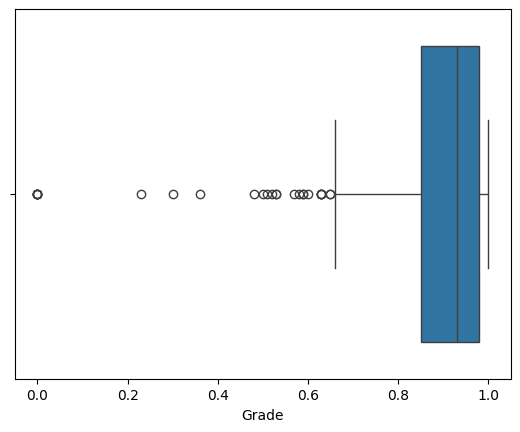

In [56]:
import seaborn as sns
# import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame
sns.boxplot(x=notas['Grade'])

# Añade un título opcional
plt.title('Box Plot de notas')
plt.show()


Se observa que en el agregado de notas, se tiene una fuerte tendencia a centrarse entre el 0.8 y el 1.0, se decide eliminar aquellos outliers que nunca respondieron ningún quiz, por lo que obtuvieron nota 0.

## Faltante

Ordenar la información según los pasos propuestos al inicio. Terminar con la modificación de outliers. Realizar un mejor análisis descriptivo.